# Analyze *falcon* complexity

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

dirFig = 'analyzeFalconAlgorithm'


### Compute the theoretical complexity

In [3]:
def complexity_ANN(n):
    part = np.zeros(np.shape(n))
    srch = np.zeros(np.shape(n))

    # For n < 1000
    mask = np.where(n < 100)
    part[mask] = 0
    srch[mask] = n[mask]**2

    # For 1000 <= n < 10^5
    mask = np.where( (100 <= n) & (n < 10**5) )
    #time[mask] = 2**np.floor(np.log2(n[mask]/39))
    npartitions = 2**np.floor(np.log2(n[mask]/39))
    part[mask] = n[mask] * npartitions
    srch[mask] = n[mask]**2 / npartitions

    # For 10^5 < n <= 10^6
    mask = np.where( (10**5 <= n) & (n < 10**6) )
    part[mask] = n[mask] / 2**16
    srch[mask] = n[mask]**2 / 2**16

    # For 10^6 < n <= 10^7
    mask = np.where( (10**6 <= n) & (n < 10**7) )
    part[mask] = n[mask] / 2**18
    srch[mask] = n[mask]**2 / 2**18

    # For n > 10^7
    mask = np.where( n > 10**7 )
    part[mask] = n[mask] / 2**20
    srch[mask] = n[mask]**2 / 2**20

    part = part/np.max(part)
    srch = srch/np.max(srch)

    return part, srch

n = np.arange(0, 50000, 10)
t_part, t_srch = complexity_ANN(n)

### Import the times computed experimentally

In [8]:
bruteForce = pd.read_csv('bruteForce/bruteForcePerformances.csv')
falconPerformances = pd.read_csv('bruteForce/falconPerformances_2.csv')

### Plot predicted vs measured complexity

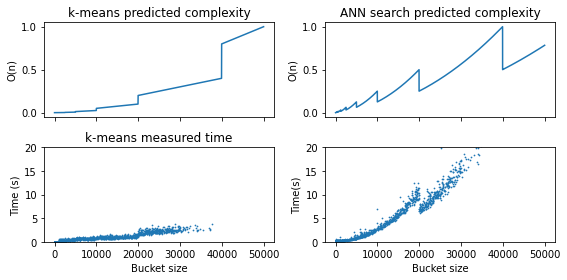

In [21]:
fig, axs = plt.subplots(2,2, figsize=(8,4), sharex=True)
#fig.suptitle("Complexity for the pairwise matrix construction")

# Predicted complexity of k-means
axs[0,0].plot(n, t_part)
axs[0,0].set(ylabel="O(n)",
           title="k-means predicted complexity")

# Predicted complexity of ANN search
axs[0,1].plot(n, t_srch)
axs[0,1].set(ylabel="O(n)",
           title="ANN search predicted complexity")

# Real time needed by Faiss k-means
axs[1,0].scatter(falconPerformances['size'], falconPerformances['time_kmeans'], s=0.5)
axs[1,0].set(ylim=(0,20), xlabel='Bucket size', ylabel='Time (s)',
             title='k-means measured time')

# Real time needed by Faiss ANN search
axs[1,1].scatter(falconPerformances['size'], falconPerformances['time_ANNsearch'], s=0.5)
axs[1,1].set(ylim=(0,20), xlabel='Bucket size', ylabel='Time(s)')

fig.tight_layout()
fig.savefig(os.path.join(dirFig, 'complexity', 'th_complexity.png'), dpi=300)
plt.show()

### Faiss vs brute force

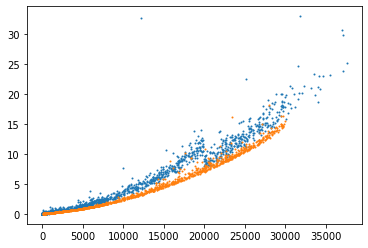

In [25]:
sizes, time = {}, {}
sizes['falcon'] = falconPerformances['size'].to_numpy()
time['falcon'] = falconPerformances['time_kmeans'].to_numpy() + falconPerformances['time_ANNsearch'].to_numpy()
sizes['bruteForce'] = bruteForce['size']
time['bruteForce'] = bruteForce['time_total']

plt.scatter(sizes['falcon'], time['falcon'], s=1.0)
plt.scatter(sizes['bruteForce'], time['bruteForce'], s=1.0)